# Importing Libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Loading Data

In [4]:
dataset = tf.keras.datasets.mnist

#Train-Test Split
(X_train, y_train), (X_test, y_test) = dataset.load_data()

#Normalization
X_train= X_train/255.0
X_test= X_test/255.0

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# ANN

In [5]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(10, activation='softmax'))

model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.fit(X_train, y_train, epochs=3, batch_size=12, validation_split=0.1)

Epoch 1/3
4500/4500 [==============================] - 6s 1ms/step - loss: 0.2852 - acc: 0.9132 - val_loss: 0.1021 - val_acc: 0.9678
Epoch 2/3
4500/4500 [==============================] - 5s 1ms/step - loss: 0.1530 - acc: 0.9541 - val_loss: 0.0820 - val_acc: 0.9748
Epoch 3/3
4500/4500 [==============================] - 6s 1ms/step - loss: 0.1209 - acc: 0.9621 - val_loss: 0.0888 - val_acc: 0.9758


# Prediction

313/313 [==============================] - 0s 749us/step


D:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


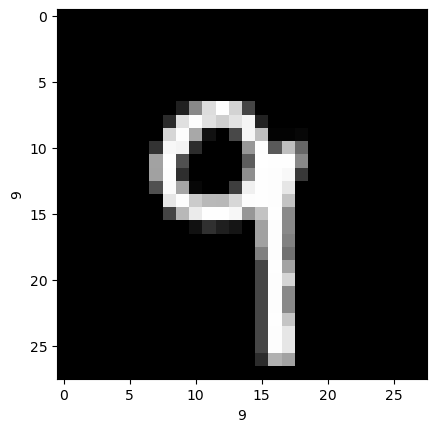

In [6]:
plt.imshow(X_test[1255].reshape(28,28), cmap='gray')
plt.xlabel(y_test[1255])
plt.ylabel(np.argmax(model.predict(X_test)[1255]))


model.save('digit_trained.h5')

# Open CV for Capturing and Predicting through Camera

In [ ]:
'''
##### cv2
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    #img = cv2.flip(img, 1)
    img = img[200:400, 200:400]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    cv2.imshow("gray_wind", gray)
    gray = cv2.resize(gray, (28, 28))
    #cv2.imshow('resized')
    gray = gray.reshape(1, 784)
    result = np.argmax(model.predict(gray))
    result = 'cnn : {}'.format(result)
    cv2.putText(img, org=(25,25), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text= result, color=(255,0,0), thickness=1)
    cv2.imshow("image", img)
   
    if cv2.waitKey(1) == 13:
        break
cap.release()
cv2.destroyAllWindows()
#plt.imshow(img)
'''

# Prediction via Paints

In [ ]:
run = False
ix,iy = -1,-1
follow = 25
img = np.zeros((512,512,1))

### func
def draw(event, x, y, flag, params):
    global run,ix,iy,img,follow
    if event == cv2.EVENT_LBUTTONDOWN:
        run = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if run == True:
            cv2.circle(img, (x,y), 20, (255,255,255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        run = False
        cv2.circle(img, (x,y), 20, (255,255,255), -1)
        gray = cv2.resize(img, (28, 28))
        gray = gray.reshape(1, 784)
        result = np.argmax(model.predict(gray))
        result = 'cnn : {}'.format(result)
        cv2.putText(img, org=(25,follow), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text= result, color=(255,0,0), thickness=1)
        follow += 25
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = np.zeros((512,512,1))
        follow = 25

### param
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)



while True:    
    cv2.imshow("image", img)
   
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()

1/1 [==============================] - 0s 14ms/step
